---

# Practical Machine Learning with Python
# Chapter 11: Deep Learning
## Guillermo Avendaño-Franco and Aldo Humberto Romero
## West Virginia University

### HPC Summer Workshop 2019

---

This notebook is based on a variety of sources, usually other notebooks, the material was adapted to the topics covered during lessons. In some cases, the original notebooks were created for Python 2.x or older versions of Scikit-learn or Tensorflow and they have to be adapted. 

## References

### Books

 * **Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems**, 1st Edition *Aurélien Géron*  (2017)

 * **Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow**, 2nd Edition, *Sebastian Raschka* and *Vahid Mirjalili* (2017)

 * **Deep Learning: A Practitioner's approach**, *Josh Patterson* and *Adam Gibson* 
 
 * **Deep Learning**, *Ian Goodfelow*, *Yoshua Bengio* and *Aaron Courville* (2016)

### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelein Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml)
   [Second Edition (In preparation)](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 
 The support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="fig/NSF.jpg" alt="National Science Foundation" style="width:50%" align="left">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="fig/DOE.jpg" alt="National Science Foundation" style="width:50%" align="right">
</div>

## Setup

This Jupyter notebook was created to run on a Python 3 kernel. Some Ipython magics were used: 

In [1]:
# commands prefaced by a % in Jupyter are called "magic"
# these "magic" commands allow us to do special things only related to jupyter

# %matplotlib inline - allows one to display charts from the matplotlib library in a notebook
# %load_ext autoreload - automatically reloads imported modules if they change
# %autoreload 2 - automatically reloads imported modules if they change
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext watermark
%watermark

2019-07-29T15:19:15-04:00

CPython 3.7.3
IPython 5.8.0

compiler   : GCC 8.3.0
system     : Linux
release    : 5.0.0-20-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import scipy
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
%watermark -iv

numpy      1.16.2
keras      2.2.4
pandas     0.23.3
matplotlib 3.0.2
scipy      1.2.1
IPython    5.8.0
sklearn    0.20.2
tensorflow 1.14.0



# Vanishing/Exploding Gradients Problem

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

[-5, 5, -0.2, 1.2]

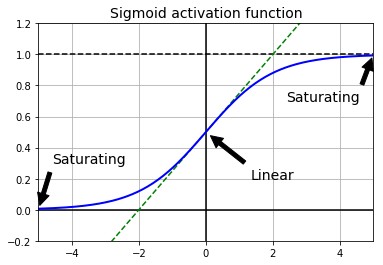

In [6]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

## Xavier and He Initialization

In [7]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'Identity',
 'Initializer',
 'K',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'absolute_import',
 'constant',
 'deserialize',
 'deserialize_keras_object',
 'division',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'normal',
 'np',
 'one',
 'ones',
 'orthogonal',
 'print_function',
 'random_normal',
 'random_uniform',
 'serialize',
 'serialize_keras_object',
 'six',
 'truncated_normal',
 'uniform',
 'zero',
 'zeros']

In [8]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

W0729 15:19:16.911003 139830258521920 deprecation_wrapper.py:119] From /home/gufranco/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [9]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## Nonsaturating Activation Functions

### Leaky ReLU

In [10]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

[-5, 5, -0.5, 4.2]

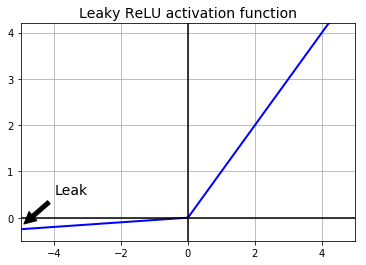

In [11]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

In [12]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['K',
 'Layer',
 'absolute_import',
 'deserialize',
 'deserialize_keras_object',
 'division',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'print_function',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'six',
 'softmax',
 'softplus',
 'softsign',
 'tanh',
 'warnings']

In [13]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

Let's train a neural network on Fashion MNIST using the Leaky ReLU:

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
tf.random.set_random_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

W0729 15:19:17.763199 139830258521920 deprecation_wrapper.py:119] From /home/gufranco/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 15:19:17.773557 139830258521920 deprecation_wrapper.py:119] From /home/gufranco/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0729 15:19:17.794706 139830258521920 deprecation_wrapper.py:119] From /home/gufranco/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

W0729 15:19:17.847986 139830258521920 deprecation_wrapper.py:119] From /home/gufranco/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 15:19:17.853953 139830258521920 deprecation_wrapper.py:119] From /home/gufranco/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

W0729 15:19:17.962524 139830258521920 deprecation.py:323] From /home/gufranco/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 86us/step - loss: 1.3336 - acc: 0.5978 - val_loss: 0.8903 - val_acc: 0.7306
Epoch 2/10
55000/55000 [==============================] - 5s 83us/step - loss: 0.7987 - acc: 0.7415 - val_loss: 0.7023 - val_acc: 0.7754
Epoch 3/10
55000/55000 [==============================] - 5s 83us/step - loss: 0.6789 - acc: 0.7753 - val_loss: 0.6259 - val_acc: 0.7954
Epoch 4/10
55000/55000 [==============================] - 5s 83us/step - loss: 0.6190 - acc: 0.7942 - val_loss: 0.5813 - val_acc: 0.8114
Epoch 5/10
55000/55000 [==============================] - 5s 84us/step - loss: 0.5805 - acc: 0.8066 - val_loss: 0.5531 - val_acc: 0.8188
Epoch 6/10
55000/55000 [==============================] - 5s 82us/step - loss: 0.5536 - acc: 0.8157 - val_loss: 0.5284 - val_acc: 0.8264
Epoch 7/10
55000/55000 [==============================] - 4s 82us/step - loss: 0.5332 - acc: 0.8206 - val_loss: 0.5124 - val_acc:

Now let's try PReLU:

In [18]:
tf.set_random_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 97us/step - loss: 1.3909 - acc: 0.5927 - val_loss: 0.9358 - val_acc: 0.7240
Epoch 2/10
55000/55000 [==============================] - 5s 92us/step - loss: 0.8279 - acc: 0.7411 - val_loss: 0.7223 - val_acc: 0.7734
Epoch 3/10
55000/55000 [==============================] - 5s 92us/step - loss: 0.6947 - acc: 0.7737 - val_loss: 0.6371 - val_acc: 0.7950
Epoch 4/10
55000/55000 [==============================] - 5s 91us/step - loss: 0.6294 - acc: 0.7925 - val_loss: 0.5882 - val_acc: 0.8094
Epoch 5/10
55000/55000 [==============================] - 5s 91us/step - loss: 0.5875 - acc: 0.8063 - val_loss: 0.5576 - val_acc: 0.8146
Epoch 6/10
55000/55000 [==============================] - 5s 92us/step - loss: 0.5586 - acc: 0.8150 - val_loss: 0.5312 - val_acc: 0.8208
Epoch 7/10
55000/55000 [==============================] - 5s 92us/step - loss: 0.5368 - acc: 0.8209 - val_loss: 0.5140 - val_acc:

### ELU

In [21]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

[-5, 5, -2.2, 3.2]

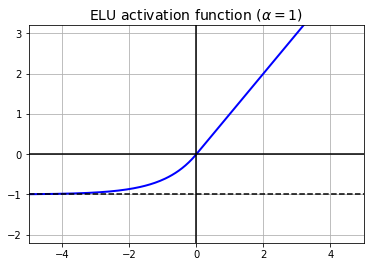

In [23]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer:

In [24]:
keras.layers.Dense(10, activation="elu")

### SELU

This activation function was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ<sub>1</sub> or ℓ<sub>2</sub> regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

In [25]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [26]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

[-5, 5, -2.2, 3.2]

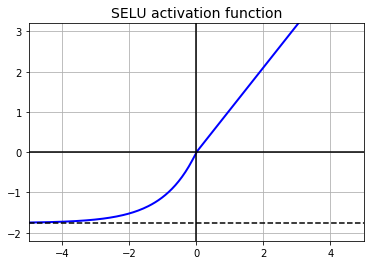

In [28]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

By default, the SELU hyperparameters (`scale` and `alpha`) are tuned in such a way that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 (assuming the inputs are standardized with mean 0 and standard deviation 1 too). Using this activation function, even a 1,000 layer deep neural network preserves roughly mean 0 and standard deviation 1 across all layers, avoiding the exploding/vanishing gradients problem:

In [29]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


Using SELU is easy:

In [30]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

Let's create a neural net for Fashion MNIST with 100 hidden layers, using the SELU activation function:

In [31]:
np.random.seed(42)
tf.set_random_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Now let's train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:

In [34]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [35]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 47s 846us/step - loss: 1.1891 - acc: 0.5612 - val_loss: 0.8281 - val_acc: 0.6924
Epoch 2/5
55000/55000 [==============================] - 43s 781us/step - loss: 0.7377 - acc: 0.7292 - val_loss: 0.6668 - val_acc: 0.7678
Epoch 3/5
55000/55000 [==============================] - 42s 771us/step - loss: 0.6117 - acc: 0.7729 - val_loss: 0.5582 - val_acc: 0.7898
Epoch 4/5
55000/55000 [==============================] - 43s 777us/step - loss: 0.5606 - acc: 0.7950 - val_loss: 0.5294 - val_acc: 0.8112
Epoch 5/5
55000/55000 [==============================] - 43s 777us/step - loss: 0.5311 - acc: 0.8107 - val_loss: 0.5127 - val_acc: 0.8242


Now look at what happens if we try to use the ReLU activation function instead:

In [36]:
np.random.seed(42)
tf.set_random_seed(42)

In [37]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [39]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 30s 538us/step - loss: 2.0022 - acc: 0.2314 - val_loss: 1.5524 - val_acc: 0.3952
Epoch 2/5
55000/55000 [==============================] - 27s 490us/step - loss: 1.3694 - acc: 0.4492 - val_loss: 1.1921 - val_acc: 0.4690
Epoch 3/5
55000/55000 [==============================] - 27s 491us/step - loss: 1.1823 - acc: 0.4895 - val_loss: 0.9198 - val_acc: 0.6154
Epoch 4/5
55000/55000 [==============================] - 27s 491us/step - loss: 0.9619 - acc: 0.5904 - val_loss: 0.8620 - val_acc: 0.6570
Epoch 5/5
55000/55000 [==============================] - 27s 493us/step - loss: 1.3278 - acc: 0.4586 - val_loss: 1.2061 - val_acc: 0.5022


Not great at all, we suffered from the vanishing/exploding gradients problem.

# Batch Normalization

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_213 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dense_214 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_215 (Dense)            (None, 10)                1010      
Total para

In [44]:
bn1.weights

[<tf.Variable 'batch_normalization_1/gamma:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/beta:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/moving_mean:0' shape=(784,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization_1/moving_variance:0' shape=(784,) dtype=float32_ref>]

In [45]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.weights]

[('batch_normalization_1/gamma:0', True),
 ('batch_normalization_1/beta:0', True),
 ('batch_normalization_1/moving_mean:0', True),
 ('batch_normalization_1/moving_variance:0', True)]

In [46]:
bn1.updates

[<tf.Tensor 'batch_normalization_1/AssignMovingAvg:0' shape=(784,) dtype=float32_ref>,
 <tf.Tensor 'batch_normalization_1/AssignMovingAvg_1:0' shape=(784,) dtype=float32_ref>]

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 11s 193us/step - loss: 0.8602 - acc: 0.7087 - val_loss: 0.5605 - val_acc: 0.8152
Epoch 2/10
55000/55000 [==============================] - 9s 170us/step - loss: 0.5781 - acc: 0.7990 - val_loss: 0.4801 - val_acc: 0.8432
Epoch 3/10
55000/55000 [==============================] - 9s 168us/step - loss: 0.5171 - acc: 0.8190 - val_loss: 0.4411 - val_acc: 0.8568
Epoch 4/10
55000/55000 [==============================] - 9s 166us/step - loss: 0.4843 - acc: 0.8293 - val_loss: 0.4198 - val_acc: 0.8612
Epoch 5/10
55000/55000 [==============================] - 8s 147us/step - loss: 0.4589 - acc: 0.8382 - val_loss: 0.4017 - val_acc: 0.8638
Epoch 6/10
55000/55000 [==============================] - 8s 144us/step - loss: 0.4406 - acc: 0.8445 - val_loss: 0.3913 - val_acc: 0.8646
Epoch 7/10
55000/55000 [==============================] - 8s 150us/step - loss: 0.4260 - acc: 0.8505 - val_loss: 0.3817 - 

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [51]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 11s 196us/step - loss: 0.8547 - acc: 0.7178 - val_loss: 0.5968 - val_acc: 0.8092
Epoch 2/10
55000/55000 [==============================] - 9s 169us/step - loss: 0.5871 - acc: 0.8012 - val_loss: 0.5087 - val_acc: 0.8308
Epoch 3/10
55000/55000 [==============================] - 9s 169us/step - loss: 0.5221 - acc: 0.8192 - val_loss: 0.4683 - val_acc: 0.8428
Epoch 4/10
55000/55000 [==============================] - 9s 169us/step - loss: 0.4845 - acc: 0.8320 - val_loss: 0.4423 - val_acc: 0.8500
Epoch 5/10
55000/55000 [==============================] - 9s 169us/step - loss: 0.4611 - acc: 0.8385 - val_loss: 0.4259 - val_acc: 0.8568
Epoch 6/10
55000/55000 [==============================] - 9s 168us/step - loss: 0.4444 - acc: 0.8435 - val_loss: 0.4124 - val_acc: 0.8618
Epoch 7/10
55000/55000 [==============================] - 9s 168us/step - loss: 0.4289 - acc: 0.8509 - val_loss: 0.4001 - 

## Gradient Clipping

All Keras optimizers accept `clipnorm` or `clipvalue` arguments:

In [52]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [53]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Reusing Pretrained Layers

### Reusing a Keras model

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [54]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [55]:
X_train_A.shape

(43986, 28, 28)

In [56]:
X_train_B.shape

(200, 28, 28)

In [57]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [58]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [59]:
tf.set_random_seed(42)
np.random.seed(42)

In [60]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [61]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [62]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 8s 190us/step - loss: 0.5678 - acc: 0.8145 - val_loss: 0.3797 - val_acc: 0.8714
Epoch 2/20
43986/43986 [==============================] - 7s 160us/step - loss: 0.3538 - acc: 0.8795 - val_loss: 0.3218 - val_acc: 0.8959
Epoch 3/20
43986/43986 [==============================] - 7s 161us/step - loss: 0.3147 - acc: 0.8918 - val_loss: 0.3007 - val_acc: 0.9008
Epoch 4/20
43986/43986 [==============================] - 7s 161us/step - loss: 0.2947 - acc: 0.8991 - val_loss: 0.2887 - val_acc: 0.9031
Epoch 5/20
43986/43986 [==============================] - 7s 160us/step - loss: 0.2817 - acc: 0.9027 - val_loss: 0.2786 - val_acc: 0.9063
Epoch 6/20
43986/43986 [==============================] - 7s 160us/step - loss: 0.2720 - acc: 0.9071 - val_loss: 0.2693 - val_acc: 0.9101
Epoch 7/20
43986/43986 [==============================] - 7s 159us/step - loss: 0.2644 - acc: 0.9097 - val_loss: 0.2655 - v

In [63]:
model_A.save("my_model_A.h5")

In [64]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [65]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [66]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 7ms/step - loss: 0.7504 - acc: 0.6100 - val_loss: 0.5297 - val_acc: 0.7343
Epoch 2/20
200/200 [==============================] - 0s 545us/step - loss: 0.4548 - acc: 0.7650 - val_loss: 0.3697 - val_acc: 0.8570
Epoch 3/20
200/200 [==============================] - 0s 520us/step - loss: 0.3195 - acc: 0.8950 - val_loss: 0.2753 - val_acc: 0.9158
Epoch 4/20
200/200 [==============================] - 0s 487us/step - loss: 0.2356 - acc: 0.9550 - val_loss: 0.2253 - val_acc: 0.9381
Epoch 5/20
200/200 [==============================] - 0s 506us/step - loss: 0.1905 - acc: 0.9700 - val_loss: 0.1921 - val_acc: 0.9533
Epoch 6/20
200/200 [==============================] - 0s 391us/step - loss: 0.1596 - acc: 0.9800 - val_loss: 0.1693 - val_acc: 0.9564
Epoch 7/20
200/200 [==============================] - 0s 432us/step - loss: 0.1376 - acc: 0.9850 - val_loss: 0.1524 - val_acc: 0.9625
Epoch 8/20
200/200

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
dense_216 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_5 (Batch (None, 300)               1200      
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_217 (Dense)            (None, 100)               30000     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
__________

In [68]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [69]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [70]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [71]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 2s 8ms/step - loss: 0.5890 - acc: 0.7000 - val_loss: 0.6500 - val_acc: 0.6633
Epoch 2/4
200/200 [==============================] - 0s 487us/step - loss: 0.5541 - acc: 0.7150 - val_loss: 0.6160 - val_acc: 0.6866
Epoch 3/4
200/200 [==============================] - 0s 484us/step - loss: 0.5221 - acc: 0.7300 - val_loss: 0.5853 - val_acc: 0.6998
Epoch 4/4
200/200 [==============================] - 0s 448us/step - loss: 0.4931 - acc: 0.7450 - val_loss: 0.5551 - val_acc: 0.7140
Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 2s 9ms/step - loss: 0.3950 - acc: 0.8050 - val_loss: 0.3556 - val_acc: 0.8266
Epoch 2/16
200/200 [==============================] - 0s 559us/step - loss: 0.2478 - acc: 0.9250 - val_loss: 0.2602 - val_acc: 0.8966
Epoch 3/16
200/200 [==============================] - 0s 533us/step - loss: 0.1782 - acc: 0.9650 - val_loss: 0.2

So, what's the final verdict?

In [72]:
model_B.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 76us/step


[0.07571890851855279, 0.9825]

In [73]:
model_B_on_A.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 77us/step


[0.059554100066423414, 0.9905]

Great! We got quite a bit of transfer: the error rate dropped by a factor of almost 4!

In [74]:
(100 - 97.05) / (100 - 99.25)

3.933333333333337

# Faster Optimizers

## Momentum optimization

In [75]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

## Nesterov Accelerated Gradient

In [76]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [77]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

## RMSProp

In [78]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

## Adam Optimization

In [79]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [80]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [81]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

### Power Scheduling

```lr = lr0 / (1 + steps / s)**c```
* Keras uses `c=1` and `s = 1 / decay`

In [82]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [83]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [84]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 10s 174us/step - loss: 0.4920 - acc: 0.8284 - val_loss: 0.4153 - val_acc: 0.8570
Epoch 2/25
55000/55000 [==============================] - 8s 154us/step - loss: 0.3803 - acc: 0.8658 - val_loss: 0.3831 - val_acc: 0.8638
Epoch 3/25
55000/55000 [==============================] - 8s 153us/step - loss: 0.3478 - acc: 0.8754 - val_loss: 0.3729 - val_acc: 0.8732
Epoch 4/25
55000/55000 [==============================] - 8s 149us/step - loss: 0.3260 - acc: 0.8841 - val_loss: 0.3627 - val_acc: 0.8752
Epoch 5/25
55000/55000 [==============================] - 9s 157us/step - loss: 0.3104 - acc: 0.8891 - val_loss: 0.3511 - val_acc: 0.8770
Epoch 6/25
55000/55000 [==============================] - 9s 156us/step - loss: 0.2976 - acc: 0.8941 - val_loss: 0.3416 - val_acc: 0.8820
Epoch 7/25
55000/55000 [==============================] - 8s 153us/step - loss: 0.2871 - acc: 0.8975 - val_loss: 0.3422 - 

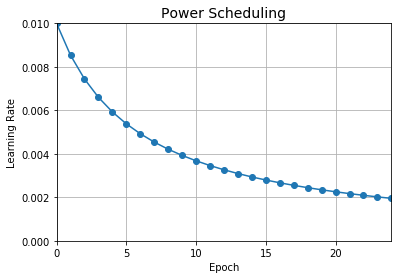

In [85]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

```lr = lr0 * 0.1**(epoch / s)```

In [86]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [87]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [88]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [89]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 12s 224us/step - loss: 1.3026 - acc: 0.7321 - val_loss: 0.9695 - val_acc: 0.7634
Epoch 2/25
55000/55000 [==============================] - 10s 180us/step - loss: 0.9334 - acc: 0.7353 - val_loss: 0.8304 - val_acc: 0.7424
Epoch 3/25
55000/55000 [==============================] - 10s 174us/step - loss: 0.8365 - acc: 0.7519 - val_loss: 0.9110 - val_acc: 0.7912
Epoch 4/25
55000/55000 [==============================] - 10s 183us/step - loss: 0.7300 - acc: 0.7864 - val_loss: 0.6810 - val_acc: 0.8204
Epoch 5/25
55000/55000 [==============================] - 10s 183us/step - loss: 0.6794 - acc: 0.8045 - val_loss: 0.6648 - val_acc: 0.8008
Epoch 6/25
55000/55000 [==============================] - 10s 180us/step - loss: 0.6112 - acc: 0.8238 - val_loss: 0.6659 - val_acc: 0.8272
Epoch 7/25
55000/55000 [==============================] - 10s 187us/step - loss: 0.5819 - acc: 0.8362 - val_loss: 0.5

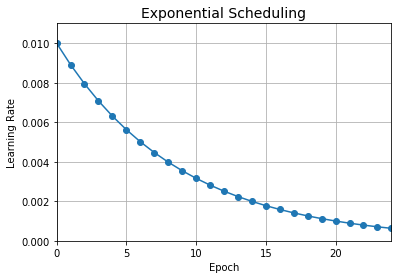

In [90]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument:

In [91]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

In [92]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
  736/55000 [..............................] - ETA: 4:19 - loss: 5.6375 - acc: 0.5163

/home/gufranco/.local/lib/python3.7/site-packages/keras/callbacks.py:99: UserWarning: Method on_batch_begin() is slow compared to the batch update (1.533713). Check your callbacks.
  % delta_t_median)


55000/55000 [==============================] - 16s 292us/step - loss: 3.2369 - acc: 0.5663 - val_loss: 1.0858 - val_acc: 0.5808
Epoch 2/25
55000/55000 [==============================] - 12s 223us/step - loss: 1.0461 - acc: 0.6242 - val_loss: 0.9750 - val_acc: 0.6356
Epoch 3/25
55000/55000 [==============================] - 12s 213us/step - loss: 0.9763 - acc: 0.6358 - val_loss: 1.1224 - val_acc: 0.5724
Epoch 4/25
55000/55000 [==============================] - 12s 213us/step - loss: 1.0458 - acc: 0.6419 - val_loss: 2.6852 - val_acc: 0.5284
Epoch 5/25
55000/55000 [==============================] - 13s 229us/step - loss: 0.9564 - acc: 0.6516 - val_loss: 0.8377 - val_acc: 0.6670
Epoch 6/25
55000/55000 [==============================] - 13s 233us/step - loss: 0.8271 - acc: 0.6695 - val_loss: 0.8127 - val_acc: 0.6778
Epoch 7/25
55000/55000 [==============================] - 12s 226us/step - loss: 0.7472 - acc: 0.6829 - val_loss: 0.8547 - val_acc: 0.6672
Epoch 8/25
55000/55000 [==============

In [93]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

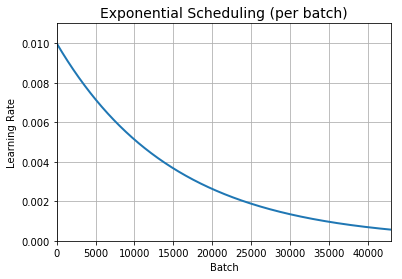

In [94]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling

In [95]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [96]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [97]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 12s 218us/step - loss: 3.6406 - acc: 0.5510 - val_loss: 3.0949 - val_acc: 0.5554
Epoch 2/25
55000/55000 [==============================] - 9s 172us/step - loss: 3.5015 - acc: 0.5000 - val_loss: 3.2606 - val_acc: 0.5004
Epoch 3/25
55000/55000 [==============================] - 9s 171us/step - loss: 3.4634 - acc: 0.4535 - val_loss: 3.1736 - val_acc: 0.5312
Epoch 4/25
55000/55000 [==============================] - 9s 167us/step - loss: 3.4222 - acc: 0.4702 - val_loss: 4.7057 - val_acc: 0.4344
Epoch 5/25
55000/55000 [==============================] - 9s 171us/step - loss: 4.0381 - acc: 0.4470 - val_loss: 3.5705 - val_acc: 0.5010
Epoch 6/25
55000/55000 [==============================] - 9s 171us/step - loss: 3.0192 - acc: 0.5196 - val_loss: 3.0362 - val_acc: 0.5248
Epoch 7/25
55000/55000 [==============================] - 9s 172us/step - loss: 2.9969 - acc: 0.5079 - val_loss: 3.0344 - 

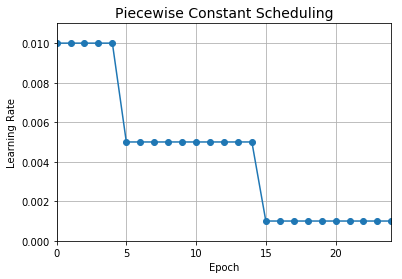

In [98]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [99]:
tf.set_random_seed(42)
np.random.seed(42)

In [100]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 10s 177us/step - loss: 0.6096 - acc: 0.8033 - val_loss: 0.6279 - val_acc: 0.7866
Epoch 2/25
55000/55000 [==============================] - 8s 147us/step - loss: 0.5175 - acc: 0.8365 - val_loss: 0.5697 - val_acc: 0.8396
Epoch 3/25
55000/55000 [==============================] - 7s 136us/step - loss: 0.5350 - acc: 0.8400 - val_loss: 0.5750 - val_acc: 0.8302
Epoch 4/25
55000/55000 [==============================] - 6s 117us/step - loss: 0.5163 - acc: 0.8472 - val_loss: 0.5192 - val_acc: 0.8524
Epoch 5/25
55000/55000 [==============================] - 7s 129us/step - loss: 0.5257 - acc: 0.8503 - val_loss: 0.5943 - val_acc: 0.8404
Epoch 6/25
55000/55000 [==============================] - 7s 119us/step - loss: 0.5486 - acc: 0.8492 - val_loss: 0.6818 - val_acc: 0.8406
Epoch 7/25
55000/55000 [==============================] - 6s 116us/step - loss: 0.5505 - acc: 0.8499 - val_loss: 0.8200 - 

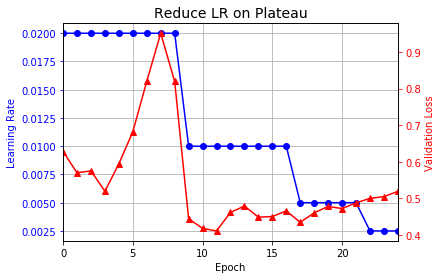

In [101]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras schedulers

In [104]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
#learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
#optimizer = keras.optimizers.SGD(learning_rate)
optimizer = keras.optimizers.SGD(lr=0.01, momentum=s, decay=0.1, nesterov=False)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 9s 170us/step - loss: nan - acc: 0.1008 - val_loss: nan - val_acc: 0.0914
Epoch 2/25
55000/55000 [==============================] - 7s 136us/step - loss: nan - acc: 0.1008 - val_loss: nan - val_acc: 0.0914
Epoch 3/25
55000/55000 [==============================] - 7s 135us/step - loss: nan - acc: 0.1008 - val_loss: nan - val_acc: 0.0914
Epoch 4/25
55000/55000 [==============================] - 7s 135us/step - loss: nan - acc: 0.1008 - val_loss: nan - val_acc: 0.0914
Epoch 5/25
55000/55000 [==============================] - 8s 138us/step - loss: nan - acc: 0.1008 - val_loss: nan - val_acc: 0.0914
Epoch 6/25
55000/55000 [==============================] - 8s 142us/step - loss: nan - acc: 0.1008 - val_loss: nan - val_acc: 0.0914
Epoch 7/25
55000/55000 [==============================] - 8s 138us/step - loss: nan - acc: 0.1008 - val_loss: nan - val_acc: 0.0914
Epoch 8/25
55000/55000 [===

For piecewise constant scheduling, try this:

In [106]:
#learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
#    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
#    values=[0.01, 0.005, 0.001])

### 1Cycle scheduling

In [115]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [116]:
tf.set_random_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [117]:
X_train_scaled.shape

(55000, 28, 28)

In [118]:
y_train.shape

(55000,)

In [120]:
batch_size = 100
#rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
#find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
#plot_lr_vs_loss(rates, losses)

In [121]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (iter2 - self.iteration)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [122]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
 2200/55000 [>.............................] - ETA: 15s - loss: 1.0401 - acc: 0.6541

/home/gufranco/.local/lib/python3.7/site-packages/keras/callbacks.py:99: UserWarning: Method on_batch_begin() is slow compared to the batch update (0.237456). Check your callbacks.
  % delta_t_median)


55000/55000 [==============================] - 5s 90us/step - loss: 0.4823 - acc: 0.8294 - val_loss: 0.4017 - val_acc: 0.8596
Epoch 2/25
55000/55000 [==============================] - 5s 94us/step - loss: 0.3660 - acc: 0.8690 - val_loss: 0.3681 - val_acc: 0.8730
Epoch 3/25
55000/55000 [==============================] - 4s 68us/step - loss: 0.3304 - acc: 0.8819 - val_loss: 0.3606 - val_acc: 0.8722
Epoch 4/25
55000/55000 [==============================] - 4s 82us/step - loss: 0.3050 - acc: 0.8910 - val_loss: 0.3373 - val_acc: 0.8810
Epoch 5/25
55000/55000 [==============================] - 4s 68us/step - loss: 0.2859 - acc: 0.8970 - val_loss: 0.3292 - val_acc: 0.8806
Epoch 6/25
55000/55000 [==============================] - 4s 81us/step - loss: 0.2707 - acc: 0.9033 - val_loss: 0.3218 - val_acc: 0.8866
Epoch 7/25
55000/55000 [==============================] - 4s 69us/step - loss: 0.2571 - acc: 0.9084 - val_loss: 0.3202 - val_acc: 0.8868
Epoch 8/25
55000/55000 [============================

# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ regularization

In [123]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [124]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 12s 226us/step - loss: 1.2845 - acc: 0.7991 - val_loss: 0.7399 - val_acc: 0.8246
Epoch 2/2
55000/55000 [==============================] - 10s 186us/step - loss: 0.7462 - acc: 0.8188 - val_loss: 0.7165 - val_acc: 0.8352


In [125]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s 234us/step - loss: 1.2915 - acc: 0.8008 - val_loss: 0.7598 - val_acc: 0.8028
Epoch 2/2
55000/55000 [==============================] - 10s 189us/step - loss: 0.7399 - acc: 0.8192 - val_loss: 0.7059 - val_acc: 0.8374


## Dropout

In [126]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

W0729 16:31:03.783902 139830258521920 deprecation.py:506] From /home/gufranco/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s 231us/step - loss: 0.5821 - acc: 0.8008 - val_loss: 0.3997 - val_acc: 0.8480
Epoch 2/2
55000/55000 [==============================] - 11s 193us/step - loss: 0.4549 - acc: 0.8353 - val_loss: 0.3749 - val_acc: 0.8646


## Alpha Dropout

In [127]:
tf.set_random_seed(42)
np.random.seed(42)

In [128]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 11s 195us/step - loss: 0.6696 - acc: 0.7581 - val_loss: 0.5674 - val_acc: 0.8438
Epoch 2/20
55000/55000 [==============================] - 9s 156us/step - loss: 0.5602 - acc: 0.7935 - val_loss: 0.5294 - val_acc: 0.8484
Epoch 3/20
55000/55000 [==============================] - 9s 156us/step - loss: 0.5271 - acc: 0.8053 - val_loss: 0.4945 - val_acc: 0.8496
Epoch 4/20
55000/55000 [==============================] - 9s 158us/step - loss: 0.5058 - acc: 0.8135 - val_loss: 0.4585 - val_acc: 0.8552
Epoch 5/20
55000/55000 [==============================] - 9s 157us/step - loss: 0.4956 - acc: 0.8172 - val_loss: 0.4705 - val_acc: 0.8618
Epoch 6/20
55000/55000 [==============================] - 9s 157us/step - loss: 0.4811 - acc: 0.8224 - val_loss: 0.4389 - val_acc: 0.8638
Epoch 7/20
55000/55000 [==============================] - 9s 160us/step - loss: 0.4714 - acc: 0.8264 - val_loss: 0.4457 - 

In [129]:
model.evaluate(X_test_scaled, y_test)

10000/10000 [==============================] - 1s 82us/step


[0.4730217566281557, 0.8606]

In [130]:
model.evaluate(X_train_scaled, y_train)

55000/55000 [==============================] - 4s 71us/step


[0.35663236950419164, 0.8838000000086698]

In [131]:
history = model.fit(X_train_scaled, y_train)

Epoch 1/1
55000/55000 [==============================] - 9s 163us/step - loss: 0.4155 - acc: 0.8444


## MC Dropout

In [134]:
tf.set_random_seed(42)
np.random.seed(42)

In [136]:
#y_probas = np.stack([model(X_test_scaled, training=True)
#                     for sample in range(100)])
#y_proba = y_probas.mean(axis=0)
#y_std = y_probas.std(axis=0)

In [ ]:
#np.round(model.predict(X_test_scaled[:1]), 2)

In [ ]:
#np.round(y_probas[:, :1], 2)

In [ ]:
#np.round(y_proba[:1], 2)

In [ ]:
#y_std = y_probas.std(axis=0)
#np.round(y_std[:1], 2)

In [ ]:
#y_pred = np.argmax(y_proba, axis=1)

In [ ]:
#accuracy = np.sum(y_pred == y_test) / len(y_test)
#accuracy

In [137]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [138]:
tf.set_random_seed(42)
np.random.seed(42)

In [ ]:
#mc_model = keras.models.Sequential([
#    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
#    for layer in model.layers
#])

In [ ]:
#mc_model.summary()

In [ ]:
#optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
#mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
#mc_model.set_weights(model.get_weights())

Now we can use the model with MC Dropout:

In [139]:
#np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

## Max norm

In [140]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [141]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s 237us/step - loss: 0.5067 - acc: 0.8246 - val_loss: 0.4345 - val_acc: 0.8418
Epoch 2/2
55000/55000 [==============================] - 12s 210us/step - loss: 0.4008 - acc: 0.8539 - val_loss: 0.3919 - val_acc: 0.8602
